<img src="jumbotron/banner.jpeg">

# FINAL PROJECT 1: LINEAR REGRESSION

Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

## Introduction

### Our Members:
1. Ahmad Firdaus Zulva
2. Notasonda Soni Putra
3. Windy Mega Melani

### Abstract

<p style='text-align: justify;'>
    Perkembangan teknologi saat ini sangat pesat, sehingga dapat mengubah gaya hidup masyarakat sebelumnya. Ini sangat memudahkan pekerjaan masyarakat dalam banyak hal, misalnya mobilitas perjalanan. Meningkatnya akses internet melalui smartphone di kalangan masyarakat dunia mengundang hadirnya transportasi online. Pada tahun 2018, New York telah menunjukkan peningkatan yang kuat dalam aktivitas bisnis, sementara juga memimpin skor global dalam human capital. Hal ini berarti, New York menjadi salah satu kota paling berpengaruh di dunia (Kearney, Global Cities Report 2018).</p>

<p style='text-align: justify;'>
Di New York, ride-hailing yang paling populer adalah Uber dan Lyft. Secara umum, tidak terdapat banyak perbedaan dari segi biaya dan waktu antara moda ride-hailing dengan taksi. Keunggulan moda ride-hailing dibandingkan dengan taksi adalah dalam aspek kenyamanan. Calon penumpang tidak harus menunggu di pinggir jalan, namun dapat menggunakan aplikasi pada smartphone untuk memanggil pengemudi. </p>
    
<p style='text-align: justify;'>
Untuk membantu masyarakat New York City dalam memilih transportasi online yang terbaik dengan harga murah berdasarkan berbagai macam pertimbangan, seperti cuaca, hari, dan jarak, maka akan dibuat sebuah Aplikasi Prediksi Harga Transportasi Online (Uber dan Lyft) di New York City dengan Menggunakan Perbandingan Metode Linear Regression dan Random Forest </p>



### Data

<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <b>Uber vs Lyft Dataset New York, USA</b> yang berisi record data perjalanan taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya. Dari 57 atribut, data yang diperlukan untuk proyek ini antara lain: </p>

- Cab_type: Merek transportasi online (Uber, Lyft).
- Name: Jenis mobil yang dipilih (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared).
- Hour: Pukul berapa transportasi online dipesan (24 jam).
- Day: Tanggal berapa transportasi online dipesan.
- Month: Bulan apa saja transportasi online dipesan (bulan 11 dan 12).
- Source: Destinasi awal.
- Destination: Destinasi akhir.
- Price: Harga transportasi online (dollar US).
- Distance: Jarak yang ditempuh (km).
- Short_summary: Cuaca ketika transportasi online dipesan (Overcast, Mostly Cloudy, Partly Cloudy, Clear, Light Rain, Rain, Possible Drizzle, Foggy, Drizzle).
- Temperature: Suhu ketika transportasi online dipesan (Celcius).
- Visibility: Jarak penglihatan.
- Surge_multiplier: Kenaikan harga penawaran ketika terjadi lonjakan penumpang.



### Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga transportasi online.
- Menemukan model terbaik untuk digunakan dalam memprediksi tarif harga transportasi online.
- Memberikan insight yang dapat membantu pihak penumpang maupun pihak transportasi online dalam bentuk charts.

## Import Libraries

In [2]:
# Library For DataFrame
import pandas as pd
import numpy as np
import pandas_profiling

# Library for datetime
import datetime
import calendar

# Librart for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

# Library for analysis
import scipy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
import pickle
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

## Data Loading

### Import Dataset

In [3]:
#Membaca data
df = pd.read_csv("rideshare_kaggle.csv")
pd.set_option("display.max.columns", None)

In [4]:
#Menampilkan 10 data teratas pada data
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,4

In [5]:
#Menampilkan 10 data terbawah pada data
df.tail(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693061,54362c72-124b-47e8-8d07-62a07cfff624,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,15.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693062,64a50889-d05b-49de-b416-1802db5c27ac,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,15.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693064,25ed29df-4f9c-4aac-8218-681427f1d738,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,West End,North End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,17.0,1.00,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,

### Number of Rows and Columns

In [6]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Dari data tersebut di dapatkan jumlah baris terdiri dari",len(df), "dan jumlah kolom berjumlah",len(df.columns))

Dari data tersebut di dapatkan jumlah baris terdiri dari 693071 dan jumlah kolom berjumlah 57


### Type of Data

In [7]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Calculate Unique Values

In [8]:
# Menghitung nilai unique pada data
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

###  View Statistical Data

In [9]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

###  Check Missing Values

In [10]:
#Mengecek missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari data tersebut, terdapat nilai missing value sebanyak 55095. Selanjutnya dilakukan penanganan missing value tersebut pada section data cleaning.

### Check the same data

In [11]:
#Mengecek data duplikat
df.duplicated().sum()

0

## Data Cleaning

### Handling Missing Values

In [12]:
#Menghapus baris yang terdapat missing values
df_clean=df.dropna()
df_clean.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [13]:
#Mengecek missing values
df_clean.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [14]:
#Melakukan crosstab pada kolom cab_type dan name
pd.crosstab(df_clean.cab_type, df_clean.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55091,55094,55096,55096


In [15]:
#Mengambil fitur-fitur yang akan digunakan untuk permodelan dan menyimpannya dalam variabel baru
col_group = [
    "cab_type", 
    "name", 
    "hour", 
    "day",
    "month",
    "source", 
    "destination", 
    "price", 
    "distance", 
    "short_summary",
    "windSpeed",
    "temperature", 
    "visibility",
    "surge_multiplier"
]

df_group = df_clean[col_group]
df_group.head(3)

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0


<b>Keterangan</b>

Dari jumlah kolom yang ada diambil beberapa kolom yang diperlukan oleh case project ini, diantaranya:
* cab_type,
* name,
* hour,
* day,
* month,
* source,
* destination,
* price,
* distance,
* short_summary,
* windSpeed,
* temperature,
* visibility,
* surge_multiplier

In [16]:
#Melihat total baris dan kolom pada df_group
df_group.shape

(637976, 14)

### Rename Columns

In [17]:
#Mengganti nama kolom
df_group.rename(columns={
    "cab_type": "transport_name", 
    "name": "kind", 
    "hour": "time",
    "source": "start", 
    "destination": "finish", 
    "short_summary": "weather"}, inplace=True)

<b>Keterangan</b>

Selanjutnya melakukan <i>rename</i> beberapa kolom agar lebih mempermudah dalam melakukan pengerjaan, berikut ini adalah kolom yang dilakukan penggantian nama:
* "cab_type": "transport_name", 
* "name": "kind", 
* "hour": "time",
* "source": "start", 
* "destination": "finish", 
* "short_summary": "weather"

In [18]:
#Menampilkan 3 baris teratas
df_group.head(3)

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0


In [19]:
#Mengganti isi data
df_group.loc[df_group["kind"] == "Taxi", "kind"] = "Uber Taxi"
df_group.loc[df_group["kind"] == "Lyft", "kind"] = "Lyft Taxi"

### Check the Value of each Attribute

In [20]:
#Mengecek total data pada setiap atribut
for col in df_group.columns:
    print(col,': ')
    print(df_group[col].value_counts())
    print("  ")
    print("  ")

transport_name : 
Uber    330568
Lyft    307408
Name: transport_name, dtype: int64
  
  
kind : 
UberXL          55096
Black SUV       55096
WAV             55096
Black           55095
UberX           55094
UberPool        55091
Lux Black XL    51235
Lux Black       51235
Lyft Taxi       51235
Lux             51235
Lyft XL         51235
Shared          51233
Name: kind, dtype: int64
  
  
time : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: time, dtype: int64
  
  
day : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: int64
  
  
month : 
12    374205
11    263771
Name:

### Determine Rates

In [21]:
# Mengecek jenis cuaca yang ada dalam data

print(df_group["weather"].value_counts())

 Overcast             201429
 Mostly Cloudy        134603
 Partly Cloudy        117226
 Clear                 80256
 Light Rain            50488
 Rain                  21781
 Possible Drizzle      17176
 Foggy                  8292
 Drizzle                6725
Name: weather, dtype: int64


In [22]:
# Membuat variabel baru df_copy untuk menampung nilai dari df_group
df_copy = df_group.copy()

# Melihat data df_copy
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,2.34,37.05,9.785,1.0
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,2.34,37.05,9.785,1.0
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,2.34,37.05,9.785,1.0
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,2.34,37.05,9.785,1.0


In [23]:
# Membuat Fungsi Rute
def rate(df_copy):
    # Jika Cuaca Overcast
    if df_copy["weather"] == " Overcast ":
        hasil = round((df_copy["price"]/df_copy["distance"])*1.5, 2)
    # Jika Cuaca Mostly Cloudy
    elif df_copy["weather"] == " Mostly Cloudy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Partly Cloudy
    elif df_copy["weather"] == " Partly Cloudy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*1.5, 2)
    # Jika Cuaca Light Rain
    elif df_copy["weather"] == " Light Rain ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2.5, 2)
    # Jika Cuaca Rain
    elif df_copy["weather"] == " Rain ":
        hasil = round((df_copy["price"]/df_copy["distance"])*3, 2)
    # Jika Cuaca Possible Drizzle
    elif df_copy["weather"] == " Possible Drizzle ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Foggy
    elif df_copy["weather"] == " Foggy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Drizzle
    elif df_copy["weather"] == " Drizzle ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2.5, 2)
    # Jika Cuaca Clear
    else:
        hasil = round(df_copy["price"]/df_copy["distance"], 2)
    return hasil

df_copy["rate"] = df_copy.apply(rate, axis=1)

In [24]:
# Melihat data df_copy
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier,rate
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0,22.73
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0,75.00
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0,15.91
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0,59.09
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0,30.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,14.25
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,19.50
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,14.25
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,40.50


<b>Keterangan</b>

Tarif (rate):
* Overcast = 1,5
* Mostly Cloudy        	= 2
* Partly Cloudy        	= 1,5
* Clear                 	= 1
* Light Rain           	= 2,5
* Rain                  	= 3
* Possible Drizzle 	= 2
* Foggy                  	= 2
* Drizzle 		= 2,5

### Route Identification

In [25]:
#Membuat kolom route berisi data dari start sampai finish
df_copy["route"] = df_copy["start"] + "-" + df_copy['finish']
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier,rate,route
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0,22.73,Haymarket Square-North Station
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0,75.00,Haymarket Square-North Station
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0,15.91,Haymarket Square-North Station
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0,59.09,Haymarket Square-North Station
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0,30.68,Haymarket Square-North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,14.25,West End-North End
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,19.50,West End-North End
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,14.25,West End-North End
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,2.34,37.05,9.785,1.0,40.50,West End-North End


## Data Exploration

In [26]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df_copy.describe()

,time,day,month,price,distance,windSpeed,temperature,visibility,surge_multiplier,rate
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,6.186795,39.582406,8.469180,1.015068,16.516964
std,6.948776,9.982083,0.492452,9.324359,1.135413,3.147856,6.725500,2.601828,0.095422,25.358145
min,0.000000,1.000000,11.000000,2.500000,0.020000,0.450000,18.910000,0.717000,1.000000,0.560000
25%,6.000000,13.000000,11.000000,9.000000,1.270000,3.410000,36.450000,8.432000,1.000000,7.450000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,5.910000,40.490000,9.880000,1.000000,12.250000
75%,18.000000,28.000000,12.000000,22.500000,2.930000,8.410000,43.580000,9.996000,1.000000,19.620000
max,23.000000,30.000000,12.000000,97.500000,7.860000,15.000000,57.220000,10.000000,3.000000,3437.500000


**Diperoleh beberapa info seperti berikut:**
- Rata rata harga yang dikeluarkan untuk menggunakan layanan jasa sekitar 16.5 Dollar.
- Tarif paling murah sekitar 2.5 dollar untuk 0.02 miles.
- Rata rata temperatur saat pemesanan layanan jasa sekitar 39.58 derajat F.

### Data Exploration and Feature

#### Explore transport_name

In [27]:
#Membuat variabel df_transport_name berisi total data dari kolom transport_name
df_transport_name = df_copy['transport_name'].value_counts()
df_transport_name

Uber    330568
Lyft    307408
Name: transport_name, dtype: int64

#### Plot transport_name

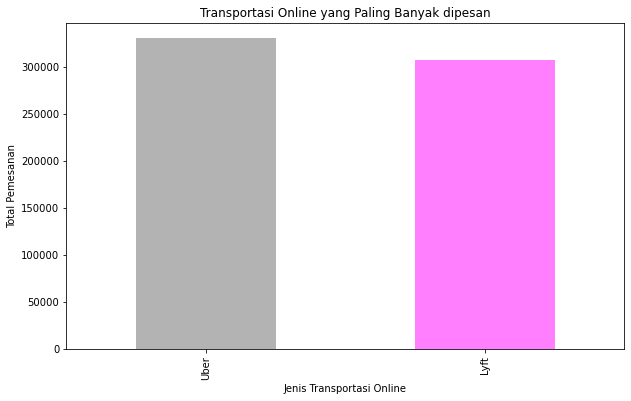

In [28]:
#Memvisualisasikan kolom transport_name dalam bentuk bar charts
df_transport_name.plot(kind='bar', figsize=(10,6), color=['dimgrey','magenta'], alpha=0.5)

plt.xlabel('Jenis Transportasi Online')
plt.ylabel('Total Pemesanan')
plt.title('Transportasi Online yang Paling Banyak dipesan')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan:**

Dari hasil bar chart di atas, dapat diketahui bahwa transportasi online yang paling banyak dipesan oleh penumpang adalah Uber dengan total penumpang 330568 dan Lyft dengan total penumpang 307408.

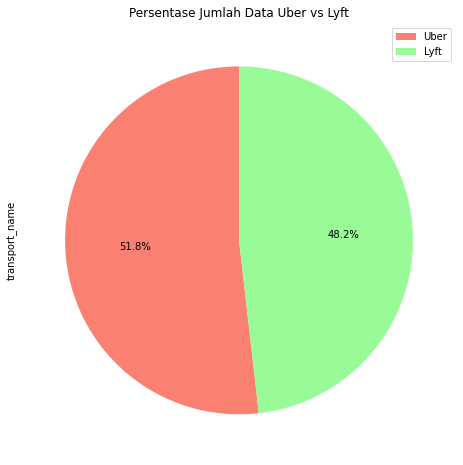

In [29]:
# Memvisualisasikan kolom transport_name dalam bentuk pie chart
pie_color=['salmon','palegreen']
df_transport_name.plot(kind="pie", figsize=(14,8), startangle=90, autopct="%1.1f%%", labels=None, colors=pie_color)
plt.title('Persentase Jumlah Data Uber vs Lyft')
plt.legend(labels=df_transport_name.index)

# Save Plot
plt.savefig("transport_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan:**

Dari hasil pie chart di atas, dapat diketahui bahwa persentase jumlah data pada Uber adalah 51.8% dan Lyft adalah 48.2%. Ini membuktikan bahwa Uber dan Lyft memiliki data yang signifikan.

#### Explore kind

In [30]:
# Melihat jenis layanan yang ditawarkan oleh Lyft
df_kind_Lyft = pd.DataFrame(df_copy[(df_copy['transport_name']=='Lyft')].groupby(['kind'])['kind'].count())
df_kind_Lyft

,kind
kind,
Lux,51235
Lux Black,51235
Lux Black XL,51235
Lyft Taxi,51235
Lyft XL,51235
Shared,51233


In [31]:
# Mengubah menjadi numerik
df_num_kind = pd.DataFrame(df_copy.groupby(["transport_name"])["kind"].value_counts())
df_num_kind

kind
transport_name kind               
Lyft           Lux           51235
               Lux Black     51235
               Lux Black XL  51235
               Lyft Taxi     51235
               Lyft XL       51235
               Shared        51233
Uber           Black SUV     55096
               UberXL        55096
               WAV           55096
               Black         55095
               UberX         55094
               UberPool      55091

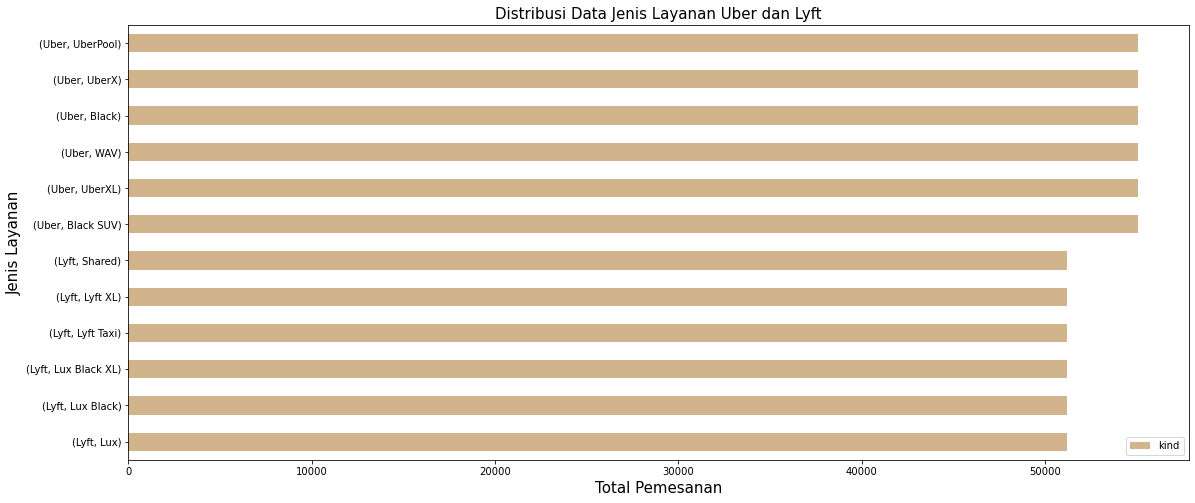

In [32]:
#Memvisualiasikan kolom transport_name dan kind berdasarkan total kind
df_num_kind.plot(kind="barh", figsize=(19,8), color='tan')

plt.title("Distribusi Data Jenis Layanan Uber dan Lyft", fontsize=15)
plt.ylabel("Jenis Layanan", fontsize=15)
plt.xlabel("Total Pemesanan", fontsize=15)

# Save Plot
plt.savefig("kind_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [33]:
df_kind_Lyft.to_csv("layanan_lyft.csv", index=False)

**Kesimpulan:**

Dari bar chart di atas, dapat diketahui bahwa Uber dengan semua tipe layanan (UberPool, UberX, Black, WAV, UberXL, dan Black SUV) memiliki data yang signifikan. Begitu pula dengan Lyft.

#### Explore weather

In [34]:
#Melihat nilai unique pada kolom weather
df_copy['weather'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [35]:
# Membuat dataframe yang berisi jumlah data penumpang berdasarkan cuaca
df_weather=pd.DataFrame(df_copy.groupby(['weather'])['weather'].value_counts())
df_weather=df_weather.rename(columns={'weather':'value'})
df_weather.reset_index(drop=True,inplace=True)
df_weather['weather']=['clear','Drizzle','Foggy','Light Rain','Mostly Cloudy',
                      'Overcast','Partly Cloudy','Possible Drizzle','Rain']
df_weather=df_weather.set_index('weather')
df_weather

,value
weather,
clear,80256
Drizzle,6725
Foggy,8292
Light Rain,50488
Mostly Cloudy,134603
Overcast,201429
Partly Cloudy,117226
Possible Drizzle,17176
Rain,21781


In [36]:
# Menyiapkan dataframe untuk ploting pie chart
df_weather_max=pd.DataFrame(df_copy.groupby(['weather','transport_name']).max()['distance'].sort_values())
df_weather_max=df_weather_max.rename(columns={'transport_name':'value'})
df_weather_max

,,distance
weather,transport_name,
Drizzle,Lyft,5.44
Foggy,Lyft,5.86
Possible Drizzle,Lyft,6.04
Partly Cloudy,Lyft,6.09
Light Rain,Lyft,6.13
Clear,Lyft,6.14
Overcast,Lyft,6.33
Rain,Lyft,6.33
Mostly Cloudy,Lyft,6.33


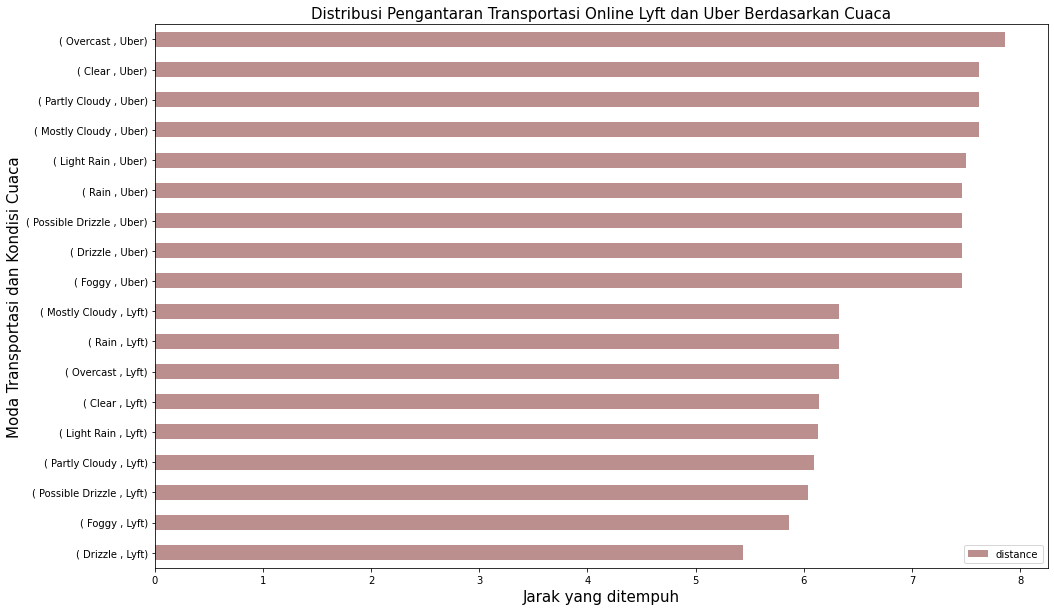

In [37]:
#Memvisualisasikan kolom weather dengan transport_name dalam bentuk horizontal bar charts
df_weather_max.plot(kind="barh", figsize=(16,10), color='rosybrown')

plt.title("Distribusi Pengantaran Transportasi Online Lyft dan Uber Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Moda Transportasi dan Kondisi Cuaca", fontsize=15)
plt.xlabel("Jarak yang ditempuh", fontsize=15)

# Save Plot
plt.savefig("weather_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan:**

Dari bar chart di atas, dapat diketahui ketika cuaca sedang mendung, Uber mengantar penumpang dengan jarak yang ditempuh maksimal sejauh 7.86 km. Sedangkan Lyft dengan cuaca berawan, jarak yang ditempuh maksimal sejauh 6.33 km.

In [38]:
#Membuat variabel cuaca dan trans untuk mendukung data cuaca yang akan divisualisasikan dalam bentuk pie charts
cuaca = df_copy['weather'].value_counts()
trans = pd.DataFrame(data=cuaca.index, columns=["weather"])
trans['values'] = cuaca.values

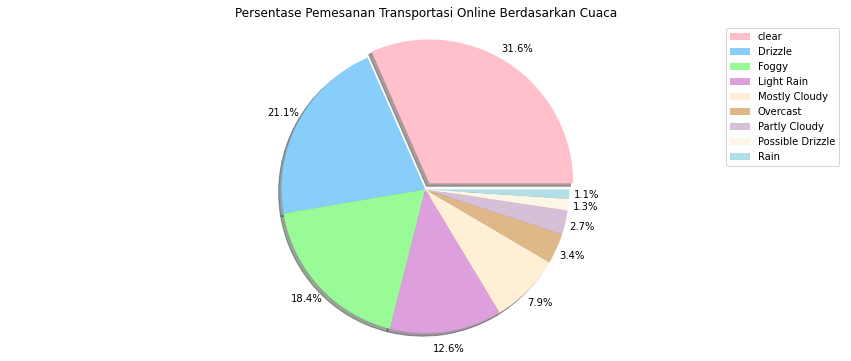

In [39]:
#Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0,0,0,0,0,0,0,0]
color_list=['pink','lightskyblue','palegreen','plum','papayawhip','burlywood','thistle','oldlace','powderblue']
cuaca.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Transportasi Online Berdasarkan Cuaca')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=df_weather.index, loc='upper right')

# Save Plot
plt.savefig("weather_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan:**

Dari hasil di atas, dapat diketahui bahwa mayoritas penumpang menggunakan transportasi online ketika cuacanya cerah dengan persentase 31,6%.

#### Explore Location (Route)

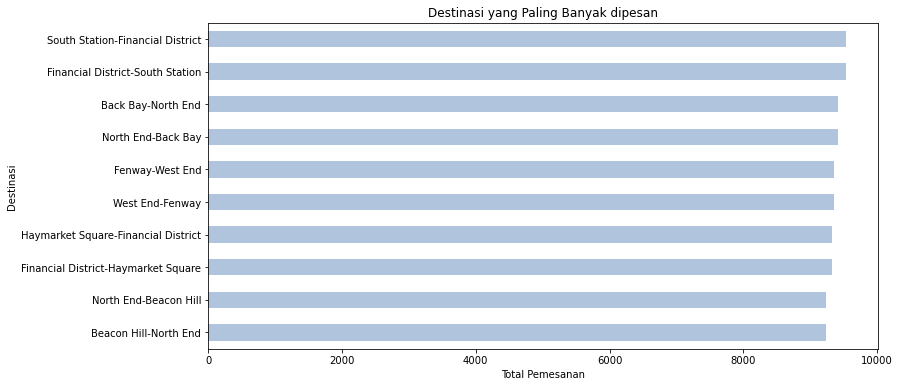

In [40]:
#Memvisualisasikan kolom route dalam bentuk horizontal bar charts
rute = df_copy['route'].value_counts()

rute_sort = rute[0:10].sort_values()
rute_sort.plot(kind='barh', figsize=(12,6), color='lightsteelblue')

plt.xlabel('Total Pemesanan')
plt.ylabel('Destinasi')
plt.title('Destinasi yang Paling Banyak dipesan')

# Save Plot
plt.savefig("route_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan:**

Dari hasil di atas, destinasi yang paling banyak dipesan yaitu dari South Station menuju Financial District dan sebaliknya dengan total 9534 kali.

#### Explore Month

In [41]:
#Membuat variabel bulan dan months untuk mendukung data month yang akan divisualisasikan dalam bentuk pie charts
bulan = df_copy['month'].value_counts()
months = pd.DataFrame(data=bulan.index, columns=["month"])
months['values'] = bulan.values

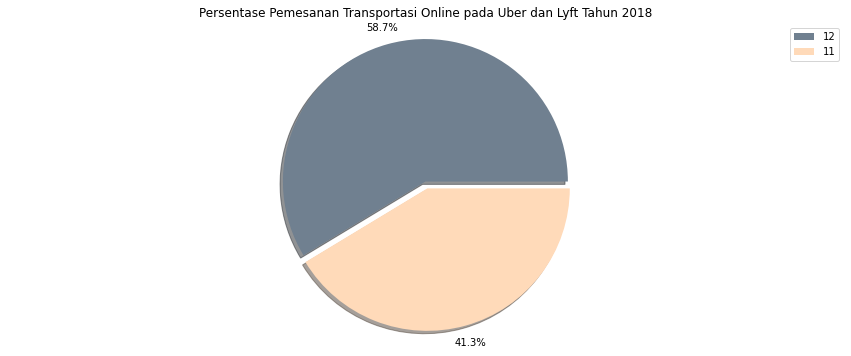

In [42]:
#Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0]
color_list=['slategrey','peachpuff']
bulan.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Transportasi Online pada Uber dan Lyft Tahun 2018')
plt.ylabel('')
plt.axis('equal')
plt.legend(bulan.index, loc='upper right')

# Save Plot
plt.savefig("month_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan:**

Dari hasil di atas, dapat diketahui bahwa dalam data hanya terdapat bulan November dan Desember. Artinya, hanya bulan tersebut yang direcord datanya. Bulan November mendapatkan hasil persentase sebesar 41.3% dan bulan Desember sebanyak 58.7%. Bulan Desember mendominasi pemesanan penumpang. Hal ini dikarenakan bulan Desember merupakan bulan liburan, sehingga banyak penumpang yang memesan transportasi online.

#### Correlation Matrix

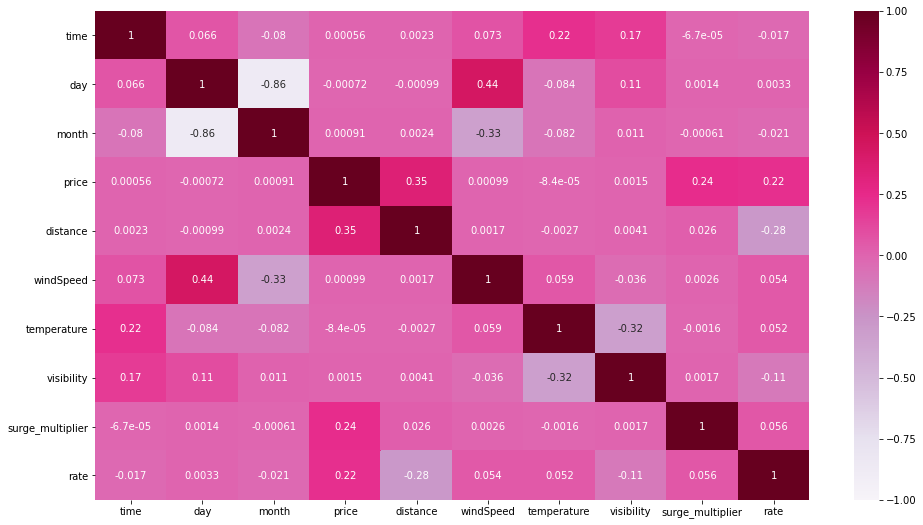

In [43]:
#Melihat korelasi antardata menggunakan heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df_copy.corr(), vmin=-1, vmax=1, annot=True, cmap="PuRd")

# Save Plot
plt.savefig("corr_heatmap.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan:**

Dari matriks korelasi didapatkan bahwa day dan temperature berkorelasi negatif dengan harga, sehingga 2 atribut ini tidak akan dipakai lagi sebagai variable pembanding harga dan data tersebut akan dihapus.

In [44]:
# Menghapus kolom day dan temperature
df_copy=df_copy.drop(['day','temperature'], axis=1)
df_copy.head(3)

,transport_name,kind,time,month,start,finish,price,distance,weather,windSpeed,visibility,surge_multiplier,rate,route
0,Lyft,Shared,9,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,10.000,1.0,22.73,Haymarket Square-North Station
1,Lyft,Lux,2,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,4.786,1.0,75.00,Haymarket Square-North Station
2,Lyft,Lyft Taxi,1,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,10.000,1.0,15.91,Haymarket Square-North Station


## Data Preprocessing

### Encoding

In [45]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=["transport_name", "kind", "time", "month", "start", "finish",
                                                  "price", "distance", "weather", "windSpeed", "visibility", "surge_multiplier", "rate", "route", ]))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_rfe = encoding_pipeline.fit_transform(df_copy)

In [46]:
#Menampilkan 5 baris teratas pada df_rfe
df_rfe.head()

,transport_name,kind,time,month,start,finish,price,distance,weather,windSpeed,visibility,surge_multiplier,rate,route
0,0,7,9,1,5,7,4,15,4,231,226,0,2197,33
1,0,2,2,0,5,7,20,15,8,274,57,0,5356,33
2,0,5,1,0,5,7,8,15,0,197,226,0,1519,33
3,0,4,4,0,5,7,53,15,0,141,226,0,4943,33
4,0,6,3,0,5,7,14,15,6,240,226,0,2976,33


In [47]:
#Membuat variabel x_transform untuk menampung hasil data yang menghapus kolom price dan rate
x_transform = df_rfe.drop(["price", "rate"], axis=1)

#Mencetak jumlah baris dan kolom pada variabel x_transform
print(x_transform.shape)

(637976, 12)


In [48]:
#Membuat variabel Y untuk menampung kolom price
Y=df_rfe['price']

#Mencetak jumlah baris dan kolom pada variabel y
print(Y.shape)

(637976,)


Setelah dilakukan encode, selanjutnya membuat feature selection menggunakan library sequantialfeatureselector dengan menggunakan LR. Di sini dilakukan pencarian 10 atribut yang paling berpengaruh dengan metode forward.

### Feature Selection

In [49]:
#Membuat variabel sfs untuk menampung hasil dari feature selection
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2', 
          cv = 3)

In [50]:
#Mencari 10 atribut yang paling berpengaruh
sfs.fit(x_transform, Y)
sfs.k_feature_names_

('transport_name',
 'kind',
 'time',
 'month',
 'start',
 'finish',
 'distance',
 'weather',
 'surge_multiplier',
 'route')

In [51]:
#Mencari dan mencetak 10 atribut yang paling berpengaruh beserta score-nya
x_transform = df_rfe.drop(['price', 'rate'], axis=1)

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x_transform, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_transform.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("best 10 features are")
print(featureScores.nlargest(10,'Score'))

best 10 features are
               Specs          Score
1               kind  347645.509407
6           distance   90197.144022
10  surge_multiplier   36103.646157
0     transport_name    4369.203636
5             finish    1448.090464
11             route     589.703583
4              start     413.207521
7            weather       1.077943
8          windSpeed       0.881697
9         visibility       0.731585


Didapatkan 10 atribut teratas untuk menjadi pembanding dari harga, karena nilai signifikan visibility terlalu kecil daripada atribut yang lain maka kita akan gunakan 8 atribut teratas untuk membuat model perkiraan harga yakni kind, distance, surge_multiplier, finish, transport_name, start, visibility, dan weather.

In [52]:
#Membuat variabel df_x yang berisi 8 atribut paling berpengaruh
X_fit=df_rfe[['transport_name','kind', 'start', 'finish', 'visibility','weather', 'distance','surge_multiplier']]

In [53]:
#Melihat data X_fit
X_fit

,transport_name,kind,start,finish,visibility,weather,distance,surge_multiplier
0,0,7,5,7,226,4,15,0
1,0,2,5,7,57,8,15,0
2,0,5,5,7,226,0,15,0
3,0,4,5,7,226,0,15,0
4,0,6,5,7,226,6,15,0
...,...,...,...,...,...,...,...,...
693065,1,11,11,6,135,6,71,0
693066,1,10,11,6,135,6,71,0
693067,1,9,11,6,135,6,71,0
693069,1,1,11,6,135,6,71,0


## Model Definition

<p style='text-align: justify;'>
Setelah melakukan data cleaning dan data preprocessing, maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya. Terdapat 8 atribut yang akan digunakan untuk membuat model perkiraan harga, yaitu <b>transport_name, kind, start, finish, visibility, weather, distance, surge_multiplier</b>. </p>
<p style='text-align: justify;'>
    Metode pengujian yang akan digunakan pada project kali ini adalah metode <b>Linear Regression</b> dengan pembanding <b>Random Forest</b>. Linear Regression adalah salah satu cara yang paling terkenal dan paling sederhana untuk memprediksi output, yang cocok dengan model linier untuk meminimalkan jumlah sisa kuadrat antara nilai prediksi dan nilai sebenarnya. Meskipun kelemahan utama dari linear regression adalah mengasumsikan linieritas antara variabel yang diprediksi dan variabel respons, tetapi data jarang dapat dipisahkan secara linier di dunia nyata.</p>
<p style='text-align: justify;'>
Sedangkan Random Forest berfungsi karena menggabungkan prediksi dari beberapa algoritma machine learning untuk membuat prediksi yang lebih akurat daripada model individual. Ini menggunakan bias rendah dan varians tinggi untuk mengurangi kesalahan.</p>

<p style='text-align: justify;'>
Ada berbagai metrics untuk mengukur kinerja model regresi, tetapi pada project ini menggunakan metrik R-squares dan RMSE (Root-mean-square-error) untuk menemukan model terbaik.</p>

In [54]:
#Membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2
X_train, X_test, Y_train, Y_test = train_test_split(
    X_fit, Y, test_size=0.20, random_state=350)

## Pelatihan Model

In [55]:
#Membuat model Random Forest
model1 = RandomForestRegressor(n_estimators = 50, random_state = 15)

In [56]:
#Membuat model Decision Tree
model2 = DecisionTreeRegressor()

In [57]:
#Membuat model Linear Regression
model3 = LinearRegression()

## Evaluasi Model

### Decision Tree Regressor

In [58]:
# Train model menggunakan training set
dt_model = model2.fit(X_train, Y_train)

In [59]:
predictions_dt = dt_model.predict(X_test)
l_dt_train_r2 = model2.score(X_train,Y_train)
l_dt_test_r2 = model2.score(X_test, Y_test)
print('Decision Tree train R squared : %.4f' % l_dt_train_r2)
print('Decision Tree test R squared": %.4f' % l_dt_test_r2)

Decision Tree train R squared : 0.9895
Decision Tree test R squared": 0.9466


In [82]:
dt_mse = mean_squared_error(predictions_dt, Y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regressor RMSE: %.4f' % dt_rmse)

Decision Tree Regressor RMSE: 4.8598


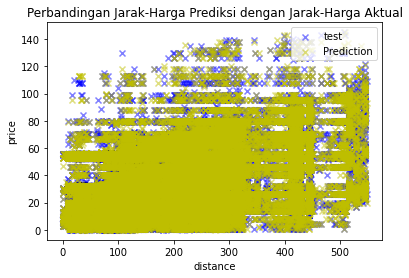

In [60]:
x_axis_dt = X_test.distance 

plt.scatter(x_axis_dt, Y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis_dt, predictions_dt, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')

# Save Plot
plt.savefig("decision_tree.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### Random Forest Regressor

In [61]:
rf_model = model1.fit(X_train, Y_train)

In [62]:
predictions_rf = rf_model.predict(X_test)
l_rf_train_r2 = model1.score(X_train,Y_train)
l_rf_test_r2 = model1.score(X_test, Y_test)
print('Random Forest train R squared : %.4f' % l_rf_train_r2)
print('Random Forest test R squared": %.4f' % l_rf_test_r2)

Random Forest train R squared : 0.9867
Random Forest test R squared": 0.9616


In [80]:
rf_mse = mean_squared_error(predictions_rf, Y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest Regression RMSE: %.4f' % rf_rmse)

Random Forest Regression RMSE: 4.1216


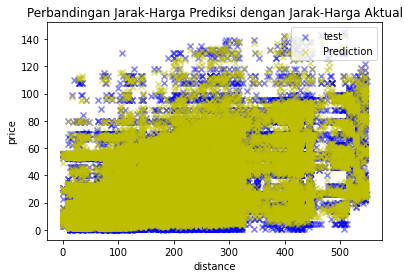

In [63]:
x_axis = X_test.distance 

plt.scatter(x_axis, Y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, predictions_rf, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')

# Save Plot
plt.savefig("random_forest.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### Linear Regression

In [64]:
lr_model = model3.fit(X_train, Y_train)

In [65]:
# Melihat nilai intercept
lr_model.intercept_

35.43884230627403

In [66]:
# Melihat nilai Koefisien
model3.coef_

array([ 5.40661229e+00, -3.71759782e+00,  6.92915323e-02,  4.42526418e-02,
       -1.05856591e-04,  1.12958845e-02,  6.62565918e-02,  1.12961592e+01])

In [67]:
predictions_lr = lr_model.predict(X_test)
l_lr_train_r2 = model3.score(X_train,Y_train)
l_lr_test_r2 = model3.score(X_test, Y_test)
print('Linear Regression train R squared : %.4f' % l_lr_train_r2)
print('Linear Regression test R squared": %.4f' % l_lr_test_r2)

Linear Regression train R squared : 0.5239
Linear Regression test R squared": 0.5232


In [78]:
lr_mse = mean_squared_error(predictions_lr, Y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 14.5194


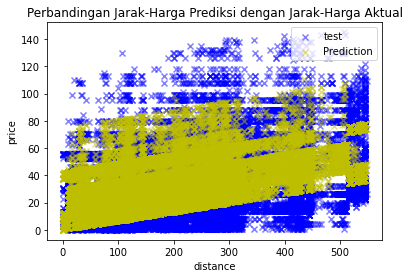

In [68]:
x_axis = X_test.distance 

plt.scatter(x_axis, Y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, predictions_lr, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')

# Save Plot
plt.savefig("linear_regression.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [69]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(X_fit,Y)

,model,best_score
0,linear_regression,0.523127


## Model Inference

In [70]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   transport_name    637976 non-null  int32
 1   kind              637976 non-null  int32
 2   start             637976 non-null  int32
 3   finish            637976 non-null  int32
 4   visibility        637976 non-null  int64
 5   weather           637976 non-null  int32
 6   distance          637976 non-null  int64
 7   surge_multiplier  637976 non-null  int64
dtypes: int32(5), int64(3)
memory usage: 31.6 MB


In [71]:
# report = df_copy.profile_report(title='Uber vs Lyft - Report',progress_bar=False)
# report

In [72]:
X_new = {'transport_name': [1, 2, 3], 'kind': [1, 2, 3], 'start': [1, 2, 3], 'finish': [1, 2, 3], 'visibility': [1, 2, 3], 'weather': [1.25, 2, 3], 'distance': [1, 2, 3],
         'surge_multiplier': [1, 2, 3]}
X_new = pd.DataFrame(X_new)

In [73]:
y_pred5 = lr_model.predict(X_new)
print('Prediksi Tarif dengan model Linear Regression yaitu: ')
print(y_pred5)

Prediksi Tarif dengan model Linear Regression yaitu: 
[48.61783075 61.79117125 74.96733572]


In [74]:
y_pred6 = rf_model.predict(X_new)
print('Prediksi Tarif dengan model Random Forest Regression yaitu: ')
print(y_pred6)

Prediksi Tarif dengan model Random Forest Regression yaitu: 
[55.4  43.14 55.26]


In [75]:
y_pred7 = dt_model.predict(X_new)
print('Prediksi Tarif dengan model Decision Tree Regressor yaitu: ')
print(y_pred7)

Prediksi Tarif dengan model Decision Tree Regressor yaitu: 
[55. 26. 56.]


## Kesimpulan

In [76]:
pickle.dump(rf_model, open('model_rf.pkl', "wb"))
pickle.dump(lr_model, open('model_lr.pkl', "wb"))
pickle.dump(dt_model, open('model_dt.pkl', "wb"))

Dari analisis di atas, dapat diambil beberapa kesimpulan:
1. Dari 57 atribut yang ada, diambil 8 atribut yang paling berpengaruh dalam prediksi harga taksi online, diantaranya kind, distance, surge_multiplier, finish, transport_name, start, visibility, dan weather.
2. Metode pengujian menggunakan 3 model, yaitu linear regression, random forest regression, dan decision tree regressor dengan masing - masing nilai akurasi 52.3%, 96.16% dan 94.66%
3. Model random forest regression adalah model yang paling optimal dengan RMSE sebesar 4.1216.